# Data Mining - Assignment 2

In [59]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
FILE = './training_set_VU_DM_2014.csv'

In [3]:
df = dd.read_csv(FILE)

In [7]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [27]:
length = len(df)
print(length)

4958347


In [17]:
uni_search = df['srch_id'].unique().compute()
uni_v_loc = df['visitor_location_country_id'].unique().compute()
uni_site = df['site_id'].unique().compute()


In [19]:
len(uni_v_loc)

210

In [16]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [21]:
# count missing values
nulls = df.isnull().sum(axis=0).compute()

In [29]:
sparsity = nulls.sort_values()/length

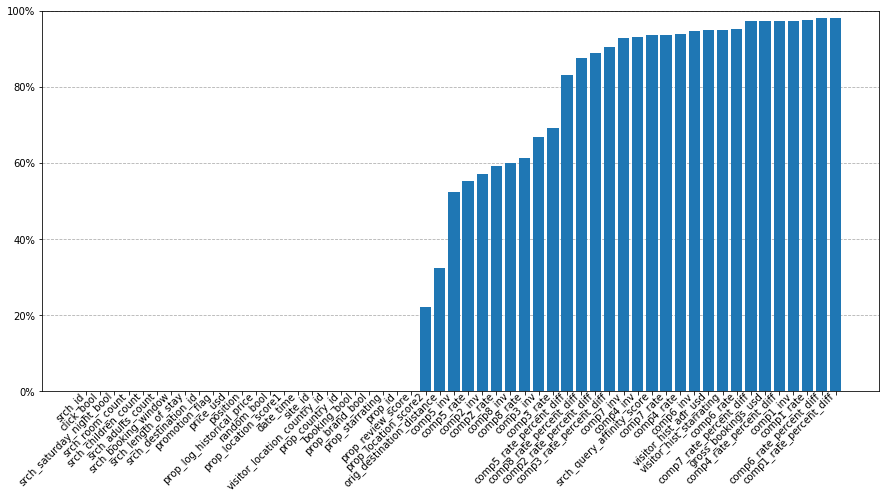

In [74]:
fig, ax = plt.subplots(figsize=[15, 7])
ax.bar(sparsity.index, sparsity.values)
ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_xticklabels(sparsity.index, rotation=45, fontdict={'ha': 'right', 'va': 'baseline'})
ax.set_yticklabels(['{:.0%}'.format(i) for i in np.linspace(0, 1, 6)])
ax.set_ylim(0, 1)
plt.show()

In [100]:
# plot hist of positions of clicked hotels
pos_clicked = df['position'].where(df['click_bool']==1).compute()

In [109]:
pos_booked = df['position'].where(df['booking_bool']==1).compute()

In [101]:
pos_clicked = pos_clicked.value_counts(normalize=True)
pos_clicked.index = pos_clicked.index.map(int)

In [110]:
pos_booked = pos_booked.value_counts(normalize=True)
pos_booked.index = pos_booked.index.map(int)

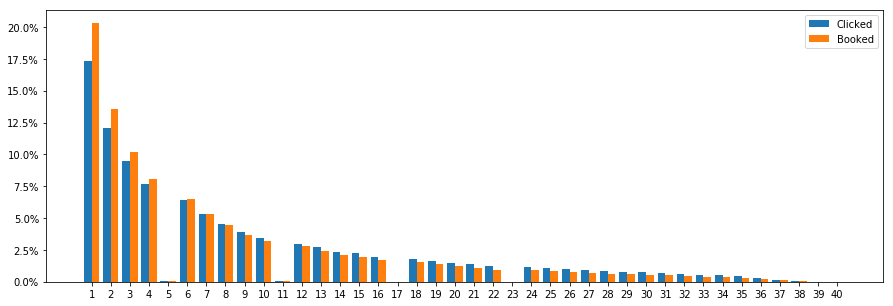

In [121]:
fig, ax = plt.subplots(figsize=[15,5])
x = np.arange(1, 41)
ax.bar(x-0.2, pos_clicked[x], width=0.4, label='Clicked')
ax.bar(x+0.2, pos_booked[x], width=0.4, label='Booked')
ax.set_xticks(x)
ax.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])

plt.legend()
plt.show()